importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

loading dataset

In [ ]:
calories_data  = pd.read_csv('/content/calories.csv')
exercise_data  = pd.read_csv('/content/exercise (3).csv')

In [ ]:
calories_data.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining both the dataframe

In [ ]:
data_final = pd.concat([calories_data['Calories'], exercise_data], axis =1)

In [ ]:
data_final.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
data_final.shape

(15000, 9)

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   User_ID     15000 non-null  int64  
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
data_final.describe()

,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [ ]:
data_final.replace({"Gender": {'male':0, 'female':1}}, inplace = True)

In [ ]:
print(data_final)

       Calories   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0         231.0  14733363       0   68   190.0    94.0      29.0       105.0   
1          66.0  14861698       1   20   166.0    60.0      14.0        94.0   
2          26.0  11179863       0   69   179.0    79.0       5.0        88.0   
3          71.0  16180408       1   34   179.0    71.0      13.0       100.0   
4          35.0  17771927       1   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995      45.0  15644082       1   20   193.0    86.0      11.0        92.0   
14996      23.0  17212577       1   27   165.0    65.0       6.0        85.0   
14997      75.0  17271188       1   43   159.0    58.0      16.0        90.0   
14998      11.0  18643037       0   78   193.0    97.0       2.0        84.0   
14999      98.0  11751526       0   63   173.0    79.0      18.0        92.0   

       Body_Temp  
0           40.8  
1

data visualization

In [ ]:
sns.set()

<Axes: ylabel='count'>

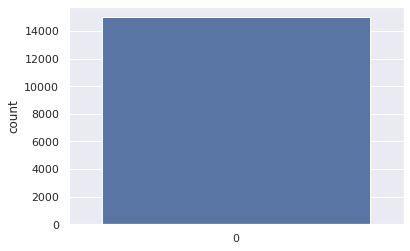

In [ ]:
# plotting the gender column in count plot
sns.countplot(data_final['Gender'])

<ipython-input-20-e7989ae87d1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_final['Age'])


<Axes: xlabel='Age', ylabel='Density'>

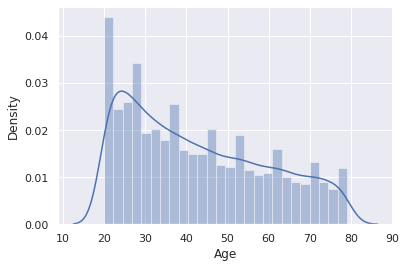

In [ ]:
# Findig the distribution of "Age" column
sns.distplot(data_final['Age'])

<ipython-input-21-5102037d1aad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_final['Height'])


<Axes: xlabel='Height', ylabel='Density'>

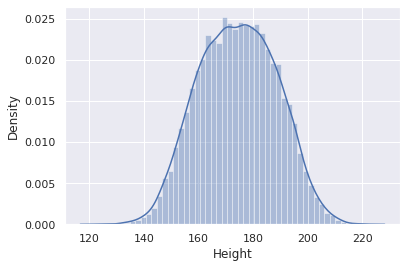

In [ ]:
# finding the distribution of "height" column
sns.distplot(data_final['Height'])

<ipython-input-22-f67af1f11855>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_final['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

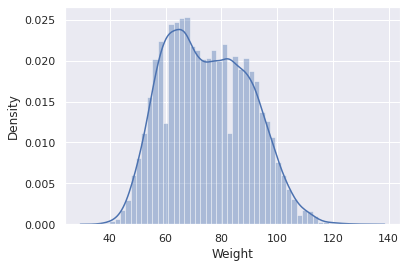

In [ ]:
# finding the distribution of "weight" column
sns.distplot(data_final['Weight'])

<ipython-input-23-1fd572cedeea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_final['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

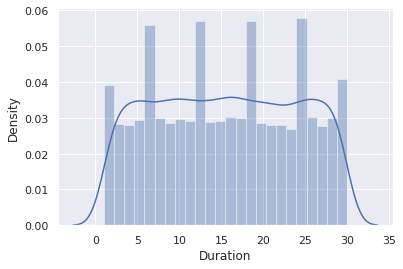

In [ ]:
# finding the distribution of "duration" column
sns.distplot(data_final['Duration'])

Finding the correlation between data:
1. Positive correlation- On increasing one value other value also increase.
2. Negative correlation - vice versa

In [ ]:
correlation = data_final.corr()

<Axes: >

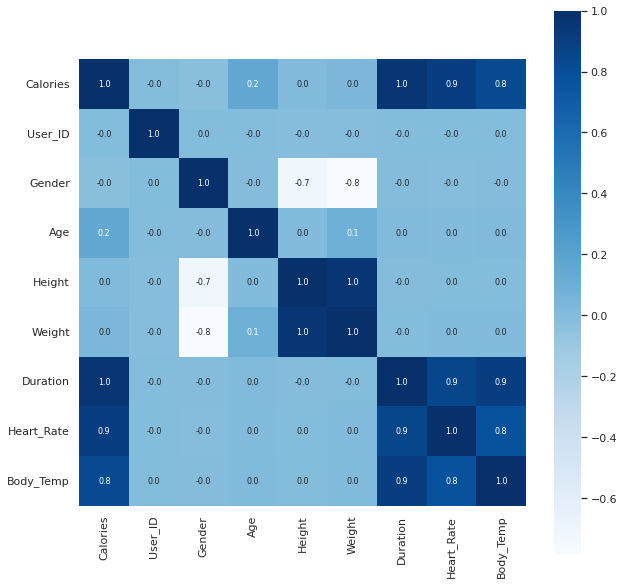

In [ ]:
# constructing 10X10 heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws= {'size':8}, cmap = 'Blues')

Separating featurea and target

In [ ]:
X = data_final.drop(columns= ['User_ID', 'Calories'], axis = 1)
Y= data_final['Calories']

Splitting data in train and test 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)


Model training

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with x train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean absolute error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4807048829992613


making prediction

In [ ]:
# input_data = ()
# # chaning the input_data in numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the data as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardized the input data

# std_data = scaler.transform(input_data_reshaped)
# print(std_data)

# prediction = classifier.predict(std_data)
# print(prediction)